### Import thư viện và nhập dữ liệu

In [1]:
import os
import pandas as pd
import numpy as np
from collections import defaultdict
import csv
import matplotlib.pyplot as plt
import random

pd.set_option('display.max_rows', None)

In [2]:
CRAWL_FILE_PATH = '../../RAW DATA/Đầu tư giáo dục  2018-2023/data-crawl-from-web.xlsx'
URL = ["https://ckns.mof.gov.vn/SitePages/nsdp-qt-Chi.aspx", "https://cknsanalysis.mof.gov.vn/custom/single/?appid=d18e8b76-f3c3-4193-8aeb-0160a9385bca&sheet=bcb6df54-3983-4ec0-be9c-5be8ffc72c2b&select=clearall&qlikTicket="]

In [3]:
import pandas as pd

try:
    df = pd.read_excel(CRAWL_FILE_PATH)
    print(df)
except PermissionError as e:
    print(f"Failed to read the file: {e}")


           Unnamed: 0 Đơn vị tính: Triệu đồng  \
0                 NaN             Năm báo cáo   
1                 NaN            Các chỉ tiêu   
2          Địa phương                 So sánh   
3            An Giang                     NaN   
4   Bà Rịa - Vũng Tàu                     NaN   
5           Bắc Giang                     NaN   
6             Bắc Kạn                     NaN   
7            Bạc Liêu                     NaN   
8            Bắc Ninh                     NaN   
9             Bến Tre                     NaN   
10          Bình Định                     NaN   
11         Bình Dương                     NaN   
12             Cà Mau                     NaN   
13            Cần Thơ                     NaN   
14           Cao Bằng                     NaN   
15            Đà Nẵng                     NaN   
16            Đắk Lắk                     NaN   
17           Đắk Nông                     NaN   
18          Điện Biên                     NaN   
19           Đồng Na

In [4]:
df

,Unnamed: 0,Đơn vị tính: Triệu đồng,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,NaN,Năm báo cáo,2018,2019,2020,2021,2022,2023
1,NaN,Các chỉ tiêu,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề,Chi giáo dục - đào tạo và dạy nghề
2,Địa phương,So sánh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh,Dự toán NS cấp Tỉnh
3,An Giang,NaN,698.327,770.919,706.612,715.631,-,-
4,Bà Rịa - Vũng Tàu,NaN,-,-,1.685.634,1.239.637,1.404.207,-
5,Bắc Giang,NaN,880.775,777.001,893.298,855.066,840.194,-
6,Bắc Kạn,NaN,-,275.112,-,187.094,463.753,-
7,Bạc Liêu,NaN,472.639,880.247,277.847,367.387,602.971,-
8,Bắc Ninh,NaN,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,-
9,Bến Tre,NaN,884.822,1.110.825,1.292.151,1.268.352,860.173,-


In [5]:
df.shape #Thiếu Huế, Bình Phước, Bình Thuận

(67, 8)

### Xóa ba hàng đầu

In [6]:
df = df.drop([0, 1, 2])
df = df.reset_index(drop=True)

df.head()

,Unnamed: 0,Đơn vị tính: Triệu đồng,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,An Giang,NaN,698.327,770.919,706.612,715.631,-,-
1,Bà Rịa - Vũng Tàu,NaN,-,-,1.685.634,1.239.637,1.404.207,-
2,Bắc Giang,NaN,880.775,777.001,893.298,855.066,840.194,-
3,Bắc Kạn,NaN,-,275.112,-,187.094,463.753,-
4,Bạc Liêu,NaN,472.639,880.247,277.847,367.387,602.971,-


### Xóa cột thứ 2


In [7]:
df = df.drop(df.columns[1], axis=1)

df

,Unnamed: 0,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,An Giang,698.327,770.919,706.612,715.631,-,-
1,Bà Rịa - Vũng Tàu,-,-,1.685.634,1.239.637,1.404.207,-
2,Bắc Giang,880.775,777.001,893.298,855.066,840.194,-
3,Bắc Kạn,-,275.112,-,187.094,463.753,-
4,Bạc Liêu,472.639,880.247,277.847,367.387,602.971,-
5,Bắc Ninh,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,-
6,Bến Tre,884.822,1.110.825,1.292.151,1.268.352,860.173,-
7,Bình Định,651.710,667.130,667.130,763.223,1,-
8,Bình Dương,1.912.319,2.223.083,3.103.078,2.832.295,2.026.742,-
9,Cà Mau,2.211.146,389.737,427.844,438.128,599.171,-


In [8]:
df.columns = ['Địa phương', '2018', '2019', '2020', '2021', '2022', '2023']

df

,Địa phương,2018,2019,2020,2021,2022,2023
0,An Giang,698.327,770.919,706.612,715.631,-,-
1,Bà Rịa - Vũng Tàu,-,-,1.685.634,1.239.637,1.404.207,-
2,Bắc Giang,880.775,777.001,893.298,855.066,840.194,-
3,Bắc Kạn,-,275.112,-,187.094,463.753,-
4,Bạc Liêu,472.639,880.247,277.847,367.387,602.971,-
5,Bắc Ninh,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,-
6,Bến Tre,884.822,1.110.825,1.292.151,1.268.352,860.173,-
7,Bình Định,651.710,667.130,667.130,763.223,1,-
8,Bình Dương,1.912.319,2.223.083,3.103.078,2.832.295,2.026.742,-
9,Cà Mau,2.211.146,389.737,427.844,438.128,599.171,-


### Thay thế - bằng NaN

In [9]:
df.replace('-', np.NaN, inplace=True)

In [10]:
df

,Địa phương,2018,2019,2020,2021,2022,2023
0,An Giang,698.327,770.919,706.612,715.631,NaN,NaN
1,Bà Rịa - Vũng Tàu,NaN,NaN,1.685.634,1.239.637,1.404.207,NaN
2,Bắc Giang,880.775,777.001,893.298,855.066,840.194,NaN
3,Bắc Kạn,NaN,275.112,NaN,187.094,463.753,NaN
4,Bạc Liêu,472.639,880.247,277.847,367.387,602.971,NaN
5,Bắc Ninh,1.322.746,2.027.226,1.277.081,1.586.982,1.473.629,NaN
6,Bến Tre,884.822,1.110.825,1.292.151,1.268.352,860.173,NaN
7,Bình Định,651.710,667.130,667.130,763.223,1,NaN
8,Bình Dương,1.912.319,2.223.083,3.103.078,2.832.295,2.026.742,NaN
9,Cà Mau,2.211.146,389.737,427.844,438.128,599.171,NaN


### Lưu dưới dạng file csv

In [11]:
data = defaultdict(lambda: defaultdict(lambda: 0))

for i in range(0, df.shape[0]):
    for year in range(2018, 2023):
        data[df.at[i, "Địa phương"]][year] = df.at[i, str(year)]

# Mở file CSV để ghi
with open('education.csv', 'w', newline='', encoding='utf-8') as csvfile:
    fieldnames = ['Địa phương', 'Năm', 'Chi tiêu cho giáo dục']
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    # Viết header
    writer.writeheader()

    # Viết dữ liệu từ data vào file CSV
    for province, years in data.items():
        for year, value in years.items():
            if province != np.NaN:
                writer.writerow({'Địa phương': province, 'Năm': year, 'Chi tiêu cho giáo dục': value})
    

In [12]:
data = pd.read_csv('education.csv')
data

,Địa phương,Năm,Chi tiêu cho giáo dục
0,An Giang,2018,698.327
1,An Giang,2019,770.919
2,An Giang,2020,706.612
3,An Giang,2021,715.631
4,An Giang,2022,NaN
5,Bà Rịa - Vũng Tàu,2018,NaN
6,Bà Rịa - Vũng Tàu,2019,NaN
7,Bà Rịa - Vũng Tàu,2020,1.685.634
8,Bà Rịa - Vũng Tàu,2021,1.239.637
9,Bà Rịa - Vũng Tàu,2022,1.404.207


### Xóa Các dòng có địa phương là NaN

In [13]:
data.dropna(subset=['Địa phương'], inplace=True)
data

,Địa phương,Năm,Chi tiêu cho giáo dục
0,An Giang,2018,698.327
1,An Giang,2019,770.919
2,An Giang,2020,706.612
3,An Giang,2021,715.631
4,An Giang,2022,NaN
5,Bà Rịa - Vũng Tàu,2018,NaN
6,Bà Rịa - Vũng Tàu,2019,NaN
7,Bà Rịa - Vũng Tàu,2020,1.685.634
8,Bà Rịa - Vũng Tàu,2021,1.239.637
9,Bà Rịa - Vũng Tàu,2022,1.404.207


### Danh sách địa phương

In [14]:
province = data['Địa phương'].unique()

In [15]:
province.shape

(63,)

In [16]:
PROVINCE_NAMES = [
    'Hà Giang', 'Cao Bằng', 'Lạng Sơn', 'Bắc Giang', 'Phú Thọ', 'Thái Nguyên', 'Bắc Kạn', 'Tuyên Quang', 
    'Lào Cai', 'Yên Bái', 'Lai Châu', 'Sơn La', 'Điện Biên', 'Hòa Bình', 'Hà Nội', 'Hải Phòng', 'Hải Dương', 
    'Hưng Yên', 'Vĩnh Phúc', 'Bắc Ninh', 'Thái Bình', 'Nam Định', 'Hà Nam', 'Ninh Bình', 'Quảng Ninh', 
    'Thanh Hóa', 'Nghệ An', 'Hà Tĩnh', 'Quảng Bình', 'Quảng Trị', 'Thừa Thiên - Huế', 'Đà Nẵng', 'Quảng Nam', 
    'Quảng Ngãi', 'Bình Định', 'Phú Yên', 'Khánh Hòa', 'Ninh Thuận', 'Bình Thuận', 'Kon Tum', 'Gia Lai', 
    'Đắk Lắk', 'Đắk Nông', 'Lâm Đồng', 'TP. Hồ Chí Minh', 'Đồng Nai', 'Bà Rịa - Vũng Tàu', 'Bình Dương', 
    'Bình Phước', 'Tây Ninh', 'TP. Cần Thơ', 'Long An', 'Tiền Giang', 'Bến Tre', 'Trà Vinh', 'Vĩnh Long', 
    'An Giang', 'Đồng Tháp', 'Kiên Giang', 'Hậu Giang', 'Sóc Trăng', 'Bạc Liêu', 'Cà Mau'
]


In [17]:
province_df = pd.DataFrame(province, columns=['province'])
province_df['exact'] = pd.Series([prov in PROVINCE_NAMES for prov in province_df['province']])

In [18]:
province_df[province_df['exact'] == False]

,province,exact
10,Cần Thơ,False
26,Hồ Chí Minh,False
27,Hoà Bình,False
60,Huế,False


In [19]:
data = data.replace('Cần Thơ', 'TP. Cần Thơ')
data = data.replace('Hồ Chí Minh', 'TP. Hồ Chí Minh')
data = data.replace('Hoà Bình', 'Hòa Bình')
data = data.replace('Huế', 'Thừa Thiên - Huế')

In [20]:
data['Địa phương'].unique()

array(['An Giang', 'Bà Rịa - Vũng Tàu', 'Bắc Giang', 'Bắc Kạn',
       'Bạc Liêu', 'Bắc Ninh', 'Bến Tre', 'Bình Định', 'Bình Dương',
       'Cà Mau', 'TP. Cần Thơ', 'Cao Bằng', 'Đà Nẵng', 'Đắk Lắk',
       'Đắk Nông', 'Điện Biên', 'Đồng Nai', 'Đồng Tháp', 'Gia Lai',
       'Hà Giang', 'Hà Nam', 'Hà Nội', 'Hà Tĩnh', 'Hải Dương',
       'Hải Phòng', 'Hậu Giang', 'TP. Hồ Chí Minh', 'Hòa Bình',
       'Hưng Yên', 'Khánh Hòa', 'Kiên Giang', 'Kon Tum', 'Lai Châu',
       'Lâm Đồng', 'Lạng Sơn', 'Lào Cai', 'Long An', 'Nam Định',
       'Nghệ An', 'Ninh Bình', 'Ninh Thuận', 'Phú Thọ', 'Phú Yên',
       'Quảng Bình', 'Quảng Nam', 'Quảng Ngãi', 'Quảng Ninh', 'Quảng Trị',
       'Sóc Trăng', 'Sơn La', 'Tây Ninh', 'Thái Bình', 'Thái Nguyên',
       'Thanh Hóa', 'Tiền Giang', 'Trà Vinh', 'Tuyên Quang', 'Vĩnh Long',
       'Vĩnh Phúc', 'Yên Bái', 'Thừa Thiên - Huế', 'Bình Phước',
       'Bình Thuận'], dtype=object)

### Chuyển dữ liệu Chi tiêu giáo dục về kiểu số (Đơn vị: nghìn tỷ đồng)

In [21]:
data['Chi tiêu cho giáo dục'] = data['Chi tiêu cho giáo dục'].str.replace('.', '').astype(float) / 1000000

In [22]:
data

,Địa phương,Năm,Chi tiêu cho giáo dục
0,An Giang,2018,0.698327
1,An Giang,2019,0.770919
2,An Giang,2020,0.706612
3,An Giang,2021,0.715631
4,An Giang,2022,NaN
5,Bà Rịa - Vũng Tàu,2018,NaN
6,Bà Rịa - Vũng Tàu,2019,NaN
7,Bà Rịa - Vũng Tàu,2020,1.685634
8,Bà Rịa - Vũng Tàu,2021,1.239637
9,Bà Rịa - Vũng Tàu,2022,1.404207


### Vẽ biểu đồ dữ liệu chi tiêu từng địa phương qua các năm

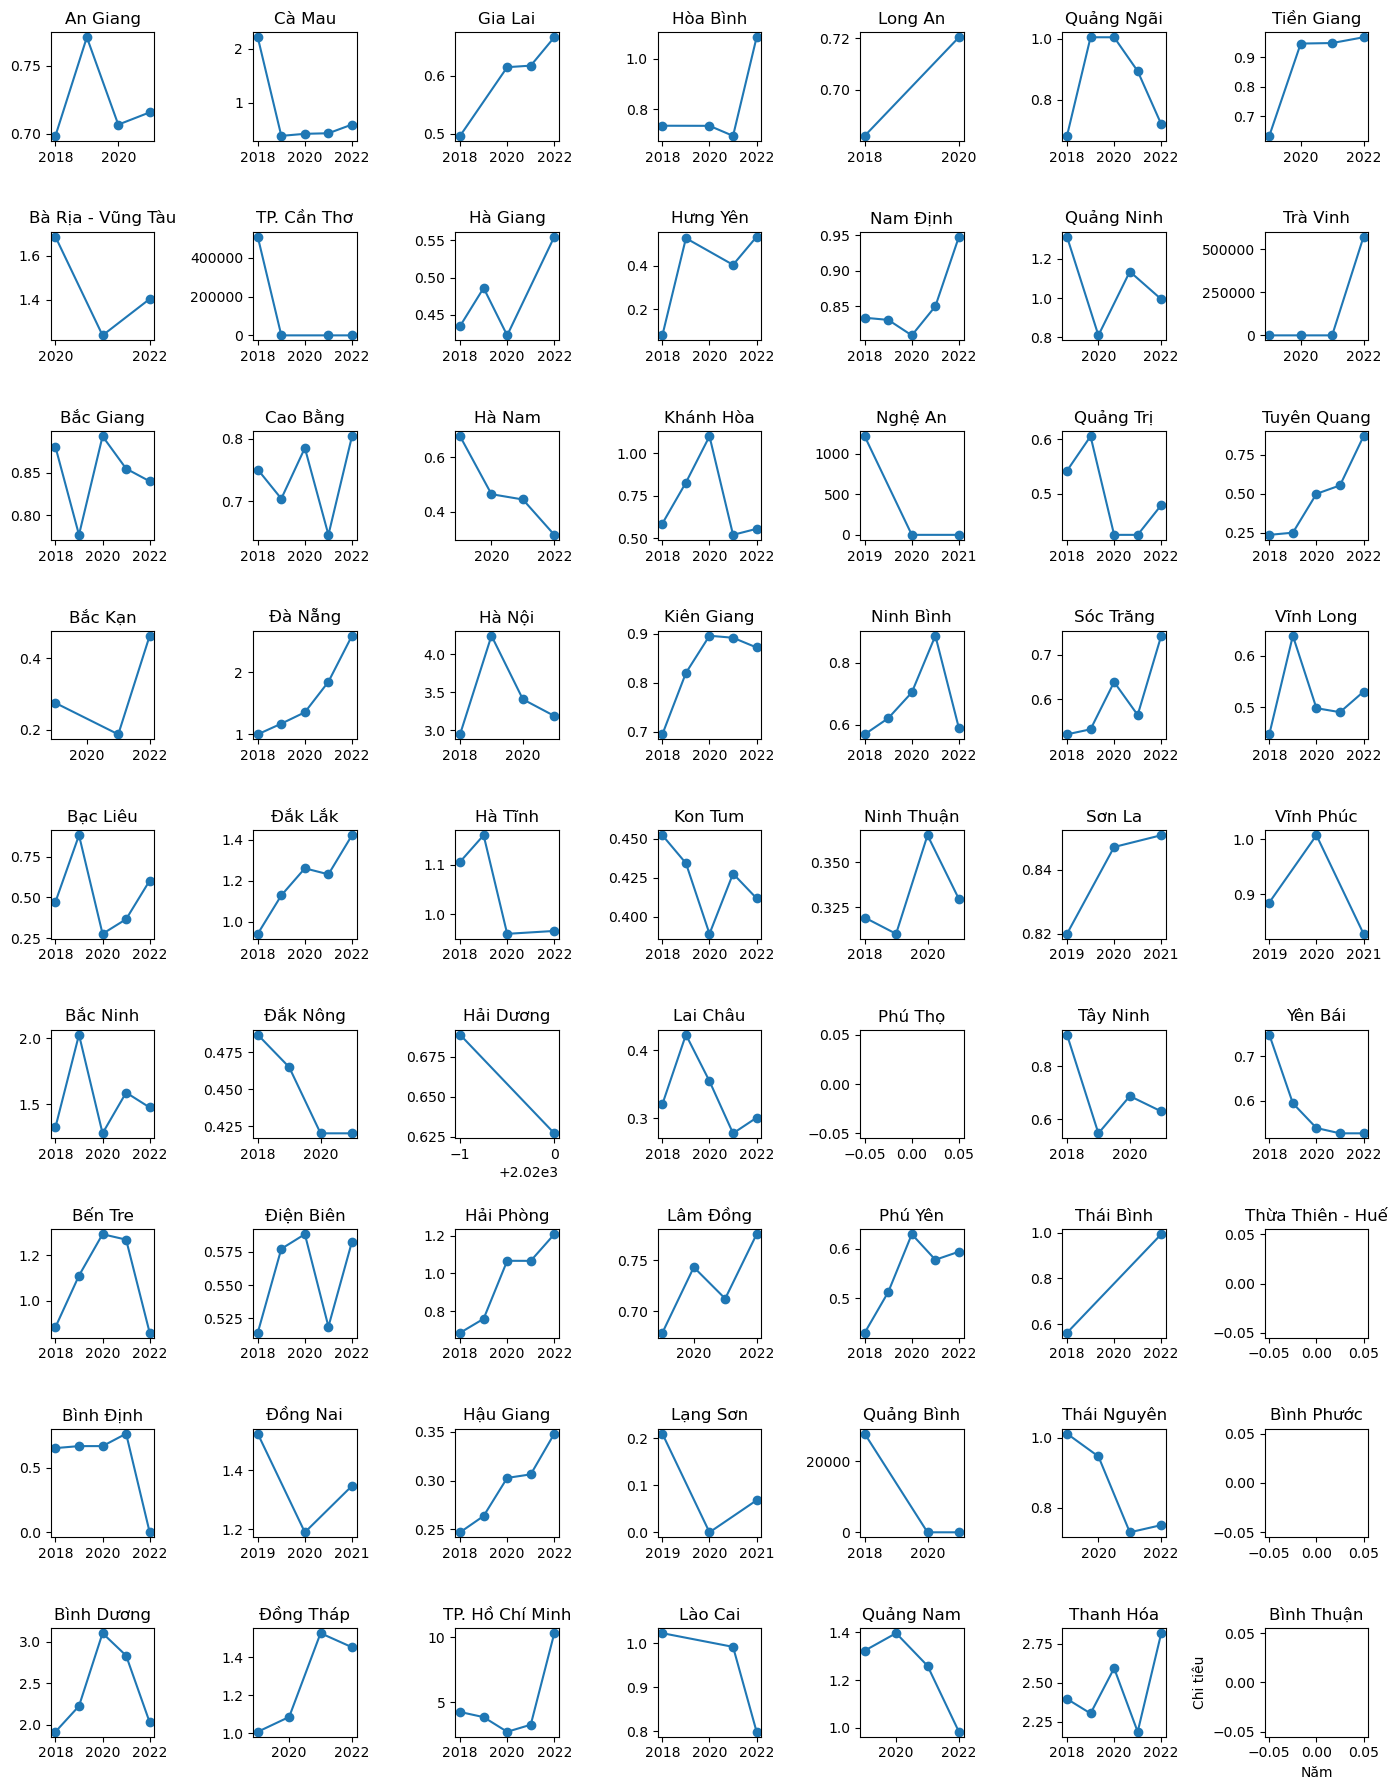

In [23]:
fig, axs = plt.subplots(9, 7, figsize=(14, 18))
i = 0
j = 0
for loc in data['Địa phương'].unique():
    temp = data[data['Địa phương'] == loc].dropna()
    axs[i, j].set_title(loc)
    # Tạo biểu đồ phân tán
    axs[i, j].scatter(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    axs[i, j].plot(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    
    # Đặt tên cho trục x và y
    plt.xlabel('Năm')
    plt.ylabel('Chi tiêu')
    if i == 8:
        i = 0
        j += 1
    else:
        i += 1

plt.tight_layout(h_pad=2.)
# Hiển thị biểu đồ
plt.show()


### Xử lí Outlier

#### Cần Thơ

In [24]:
data[data['Địa phương'] == 'Cần Thơ']

,Địa phương,Năm,Chi tiêu cho giáo dục


In [25]:
data['Chi tiêu cho giáo dục'].loc[50] = data['Chi tiêu cho giáo dục'].loc[50] / 1000000

C:\Users\leatu\AppData\Local\Temp\ipykernel_20916\1454072819.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[50] = data['Chi tiêu cho giáo dục'].loc[50] / 1000000


#### Trà Vinh

In [26]:
data[data['Địa phương'] == 'Trà Vinh']

,Địa phương,Năm,Chi tiêu cho giáo dục
275,Trà Vinh,2018,NaN
276,Trà Vinh,2019,0.770248
277,Trà Vinh,2020,0.671181
278,Trà Vinh,2021,0.623709
279,Trà Vinh,2022,572624.000000


In [27]:
data['Chi tiêu cho giáo dục'].loc[279] = data['Chi tiêu cho giáo dục'].loc[279] / 1000000

C:\Users\leatu\AppData\Local\Temp\ipykernel_20916\2050218910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[279] = data['Chi tiêu cho giáo dục'].loc[279] / 1000000


In [28]:
data[data['Địa phương'] == 'Trà Vinh']

,Địa phương,Năm,Chi tiêu cho giáo dục
275,Trà Vinh,2018,NaN
276,Trà Vinh,2019,0.770248
277,Trà Vinh,2020,0.671181
278,Trà Vinh,2021,0.623709
279,Trà Vinh,2022,0.572624


#### Quảng Bình

In [29]:
data[data['Địa phương'] == 'Quảng Bình']

,Địa phương,Năm,Chi tiêu cho giáo dục
215,Quảng Bình,2018,27806.000000
216,Quảng Bình,2019,NaN
217,Quảng Bình,2020,0.772024
218,Quảng Bình,2021,0.692123
219,Quảng Bình,2022,NaN


In [30]:
data['Chi tiêu cho giáo dục'].loc[215] = data['Chi tiêu cho giáo dục'].loc[215] / 1000000

C:\Users\leatu\AppData\Local\Temp\ipykernel_20916\3015950434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[215] = data['Chi tiêu cho giáo dục'].loc[215] / 1000000


In [31]:
data[data['Địa phương'] == 'Quảng Bình']

,Địa phương,Năm,Chi tiêu cho giáo dục
215,Quảng Bình,2018,0.027806
216,Quảng Bình,2019,NaN
217,Quảng Bình,2020,0.772024
218,Quảng Bình,2021,0.692123
219,Quảng Bình,2022,NaN


#### Nghệ An

In [32]:
data[data['Địa phương'] == 'Nghệ An']

,Địa phương,Năm,Chi tiêu cho giáo dục
190,Nghệ An,2018,NaN
191,Nghệ An,2019,1213.115000
192,Nghệ An,2020,1.205852
193,Nghệ An,2021,1.125529
194,Nghệ An,2022,NaN


In [33]:
data['Chi tiêu cho giáo dục'].loc[191] = data['Chi tiêu cho giáo dục'].loc[191] / 1000

C:\Users\leatu\AppData\Local\Temp\ipykernel_20916\1015249910.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Chi tiêu cho giáo dục'].loc[191] = data['Chi tiêu cho giáo dục'].loc[191] / 1000


In [34]:
data[data['Địa phương'] == 'Nghệ An']

,Địa phương,Năm,Chi tiêu cho giáo dục
190,Nghệ An,2018,NaN
191,Nghệ An,2019,1.213115
192,Nghệ An,2020,1.205852
193,Nghệ An,2021,1.125529
194,Nghệ An,2022,NaN


#### Vẽ lại biểu đồ các tỉnh có outlier

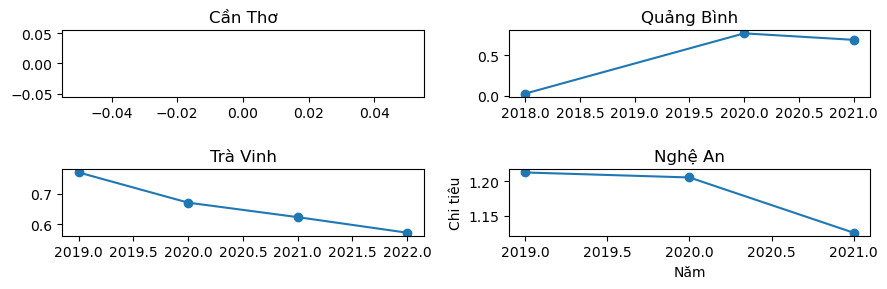

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(9, 3))
i = 0
j = 0
for loc in ['Cần Thơ', 'Trà Vinh', 'Quảng Bình', 'Nghệ An']:
    temp = data[data['Địa phương'] == loc].dropna()
    axs[i, j].set_title(loc)
    # Tạo biểu đồ phân tán
    axs[i, j].scatter(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    axs[i, j].plot(temp['Năm'].astype(int), temp['Chi tiêu cho giáo dục'])
    
    # Đặt tên cho trục x và y
    plt.xlabel('Năm')
    plt.ylabel('Chi tiêu')
    if i == 1:
        i = 0
        j += 1
    else:
        i += 1

plt.tight_layout(h_pad=2.)
# Hiển thị biểu đồ
plt.show()


### Box plot

In [36]:
data[data['Chi tiêu cho giáo dục'] == data['Chi tiêu cho giáo dục'].max()]

,Địa phương,Năm,Chi tiêu cho giáo dục
134,TP. Hồ Chí Minh,2022,10.30881


In [37]:
data[data['Chi tiêu cho giáo dục'] == data['Chi tiêu cho giáo dục'].min()]

,Địa phương,Năm,Chi tiêu cho giáo dục
39,Bình Định,2022,0.000001
172,Lạng Sơn,2020,0.000001


### Thay thế các dữ liệu Nan bằng giá trị trung bình

In [38]:
for loc in data['Địa phương'].unique():
    mean_value = data.loc[data['Địa phương'] == loc, 'Chi tiêu cho giáo dục'].mean()
    data.loc[data['Địa phương'] == loc, 'Chi tiêu cho giáo dục'] = data.loc[data['Địa phương'] == loc, 'Chi tiêu cho giáo dục'].fillna(mean_value)

In [39]:
data

,Địa phương,Năm,Chi tiêu cho giáo dục
0,An Giang,2018,0.698327
1,An Giang,2019,0.770919
2,An Giang,2020,0.706612
3,An Giang,2021,0.715631
4,An Giang,2022,0.722872
5,Bà Rịa - Vũng Tàu,2018,1.443159
6,Bà Rịa - Vũng Tàu,2019,1.443159
7,Bà Rịa - Vũng Tàu,2020,1.685634
8,Bà Rịa - Vũng Tàu,2021,1.239637
9,Bà Rịa - Vũng Tàu,2022,1.404207


In [40]:
data[data['Chi tiêu cho giáo dục'].isna()]

,Địa phương,Năm,Chi tiêu cho giáo dục
205,Phú Thọ,2018,NaN
206,Phú Thọ,2019,NaN
207,Phú Thọ,2020,NaN
208,Phú Thọ,2021,NaN
209,Phú Thọ,2022,NaN
300,Thừa Thiên - Huế,2018,NaN
301,Thừa Thiên - Huế,2019,NaN
302,Thừa Thiên - Huế,2020,NaN
303,Thừa Thiên - Huế,2021,NaN
304,Thừa Thiên - Huế,2022,NaN


### Loại bỏ tất cả các tỉnh không có dữ liệu

In [41]:
data.dropna(inplace=True)

In [42]:
data[data['Chi tiêu cho giáo dục'].isna()].shape[0]

0

In [45]:
data.to_csv('clean_education_data.csv', index=False)

c:\Users\leatu\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


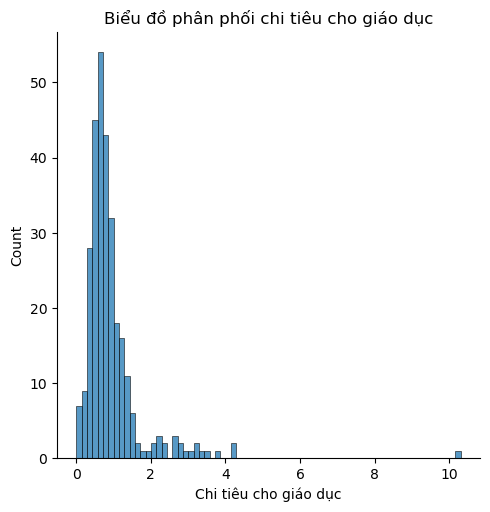

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a histogram for flipper length
sns.displot(data, x="Chi tiêu cho giáo dục")
plt.title("Biểu đồ phân phối chi tiêu cho giáo dục")
plt.show()
